In [ ]:
import io
from google.colab import files
uploaded = files.upload()

Saving weight-height.csv to weight-height.csv


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('weight-height.csv')

In [ ]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [ ]:
x = df[['Height']].values #input hoga .values ---> numpy array me convert krdeta
y_true = df[['Weight']].values 

In [ ]:
def line(x, w = 0, b = 0): #parameters weight and bias
  return w*x+b

In [ ]:
def mean_squared_error(y_true, y_pred): #losss function used in regression
  s =(y_true - y_pred)**2               #predict and target points ka farq nikalata hai
  return np.sqrt(s.mean())

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Text(0.5, 0, 'b')

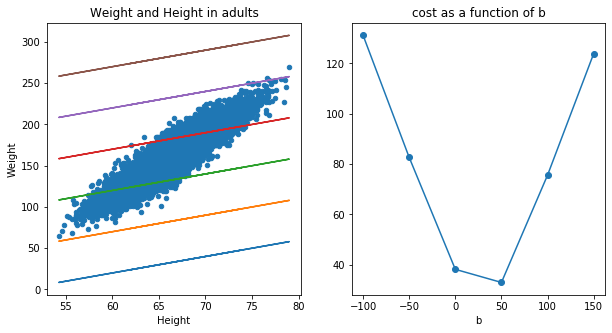

In [ ]:
plt.figure(figsize = (10,5))
axl = plt.subplot(121)
df. plot(kind = 'scatter', #random height and weight data
         x = 'Height',
         y = 'Weight',
         title = 'Weight and Height in adults',ax = axl)
bs = np.array([-100,-50,0,50,100,150]) #baised values
mses = [] #mean square error
for b in bs:
  y_pred = line(x, w =2, b=b)
  mse = mean_squared_error(y_true,y_pred)  
  mses.append(mse)
  plt.plot(x,y_pred) jo bhi prdict true kr rha hai
ax2 = plt.subplot(122)
plt.plot(bs,mses, 'o-') #ploting loss 
plt.title('cost as a function of b')
plt.xlabel('b')


In [ ]:
#LINEAR REGRESSION WITH KERAS!
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
model = Sequential()
model.add(Dense(1, input_shape=(1,)))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [ ]:
model.summary() #show overall summary of model

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(Adam(lr=0.8),'mean_squared_error')

In [ ]:
model.fit(x,y_true,epochs = 40)

Train on 10000 samples
Epoch 1/40
10000/10000 [==============================] - 0s 34us/sample - loss: 1157.7758
Epoch 2/40
10000/10000 [==============================] - 0s 28us/sample - loss: 561.2592
Epoch 3/40
10000/10000 [==============================] - 0s 28us/sample - loss: 530.1085
Epoch 4/40
10000/10000 [==============================] - 0s 29us/sample - loss: 481.1295
Epoch 5/40
10000/10000 [==============================] - 0s 27us/sample - loss: 465.7604
Epoch 6/40
10000/10000 [==============================] - 0s 28us/sample - loss: 434.6552
Epoch 7/40
10000/10000 [==============================] - 0s 27us/sample - loss: 381.2235
Epoch 8/40
10000/10000 [==============================] - 0s 27us/sample - loss: 343.3264
Epoch 9/40
10000/10000 [==============================] - 0s 28us/sample - loss: 317.1790
Epoch 10/40
10000/10000 [==============================] - 0s 27us/sample - loss: 301.1123
Epoch 11/40
10000/10000 [==============================] - 0s 28us/sample -

In [ ]:
y_pred = model.predict(x)

In [ ]:
y_pred

array([[223.311  ],
       [184.13956],
       [225.34561],
       ...,
       [146.13736],
       [186.09097],
       [131.25992]], dtype=float32)

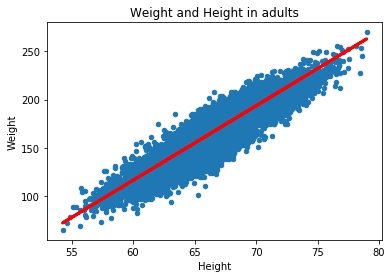

In [ ]:
df. plot(kind = 'scatter', #random height and weight data
         x = 'Height',
         y = 'Weight',
         title = 'Weight and Height in adults')
plt.plot(x, y_pred,color = 'red', linewidth = 3)

In [ ]:
w,b = model.get_weights()

In [ ]:
w

array([[7.733584]], dtype=float32)

In [ ]:
b

array([-347.7911], dtype=float32)

In [ ]:
model.predict([[73]])

array([[216.76053]], dtype=float32)